In [16]:
import requests
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
# General libraries
import numpy as np
import pandas as pd
import os
import joblib

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


#Logistic Regression
from sklearn.linear_model import LogisticRegression



In [17]:
shared_link = 'https://drive.google.com/file/d/1OebtXolWNXVsNkLIpISyL-fjT7AR7G9e/view?usp=drive_link'

# Extract the file ID from the shared link
file_id = shared_link.split('/')[-2]
download_link = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download the data set
response = requests.get(download_link)

# Save the Data temporarily (you can delete it later)
with open('Titanic_train.csv', 'wb') as f:
    f.write(response.content)
data=pd.read_csv('Titanic_train.csv')
data.head(20)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [18]:
data .info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Convert categorical features to numerical using one-hot encoding
categorical_cols = ['Sex', 'Embarked']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    bool   
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB


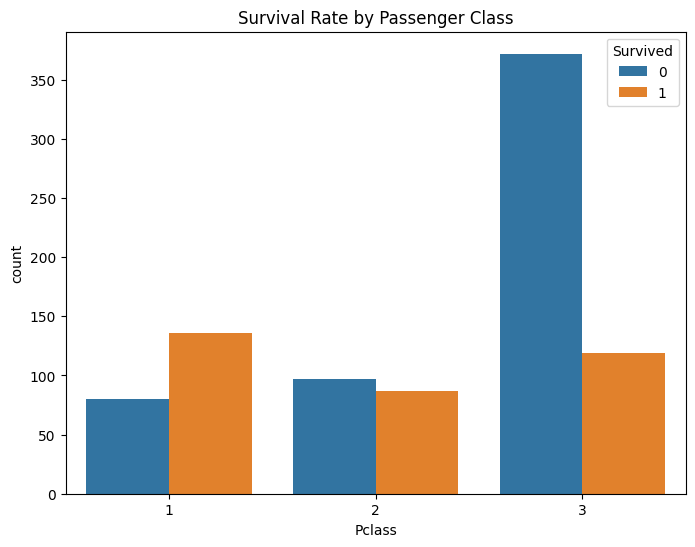

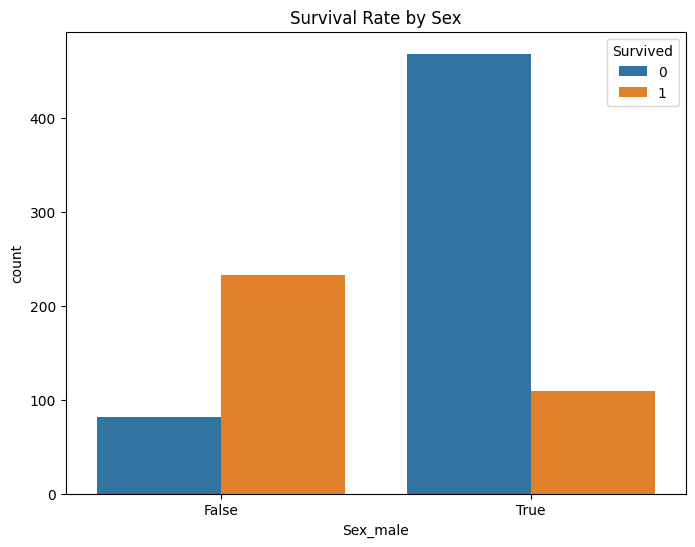

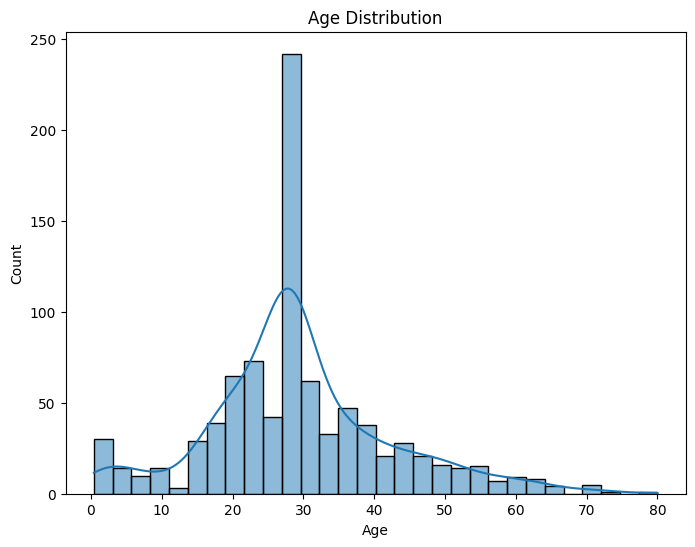

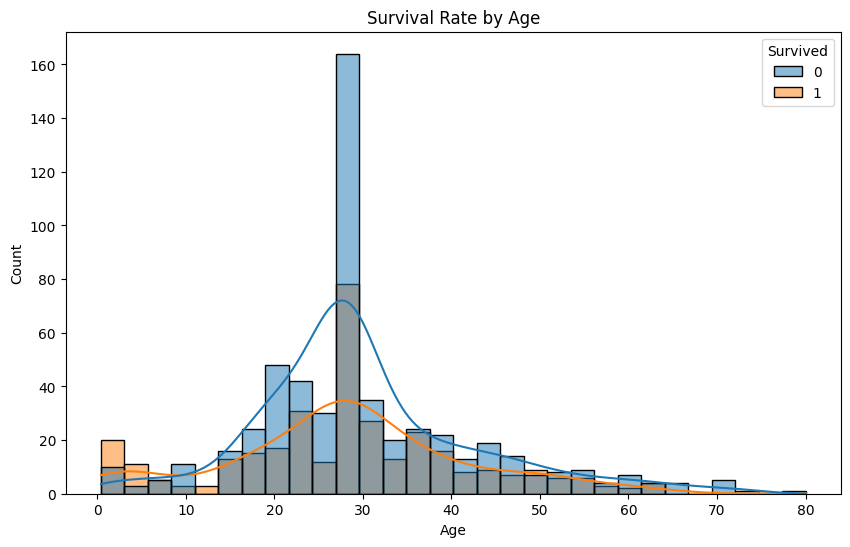

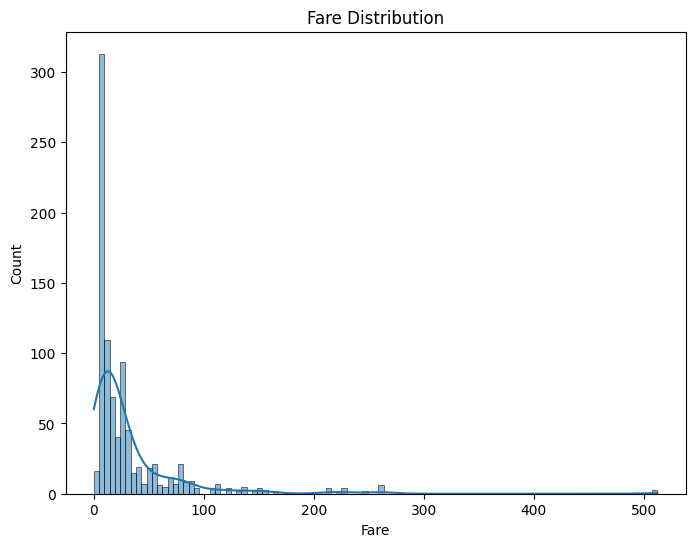

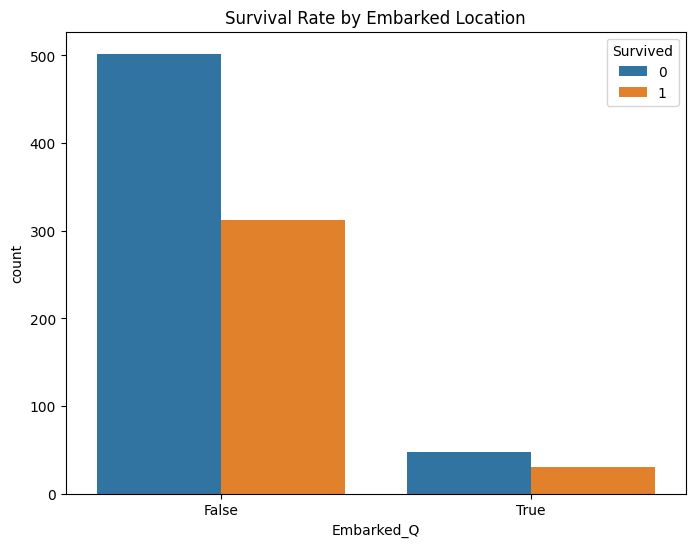

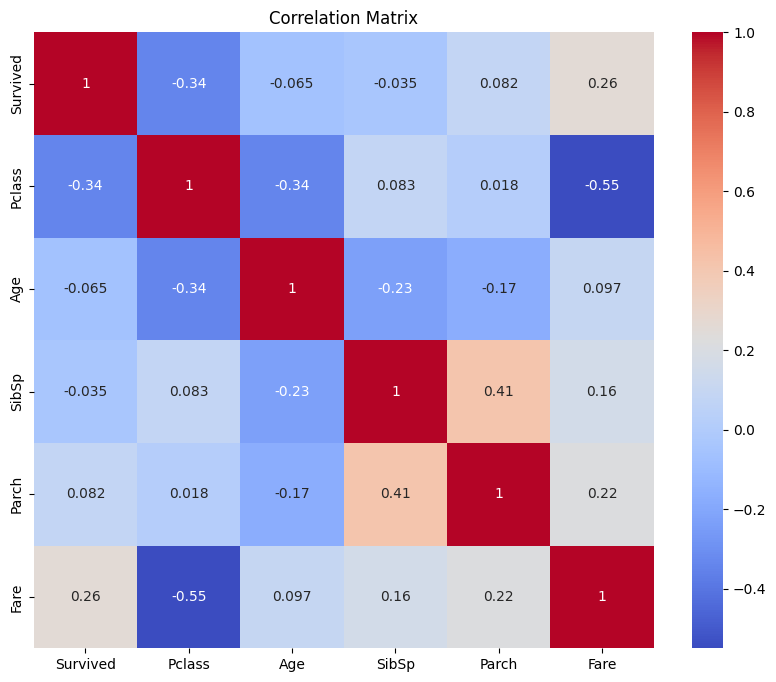

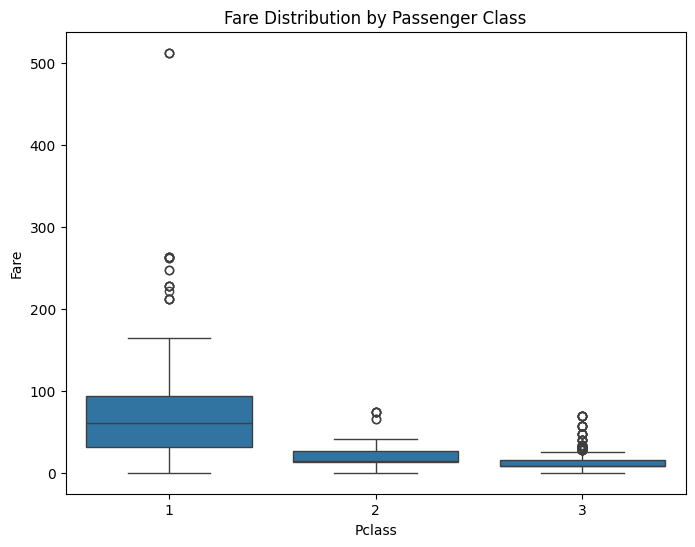

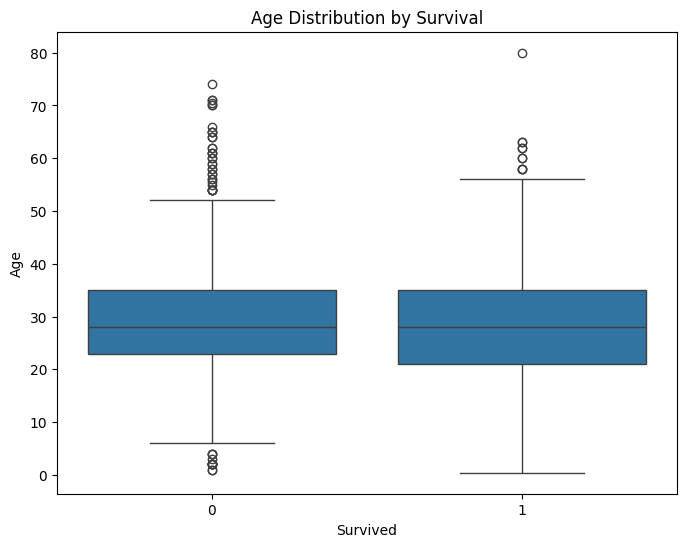

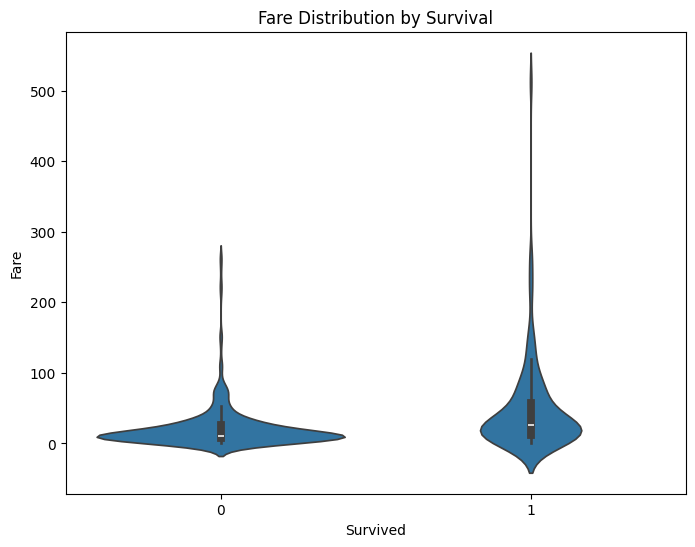

In [22]:
# 1. Survival Rate by Passenger Class
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival Rate by Passenger Class')
plt.show()

# 2. Survival Rate by Sex
plt.figure(figsize=(8, 6))
# The original 'Sex' column is now 'Sex_male' after one-hot encoding
sns.countplot(x='Sex_male', hue='Survived', data=data)
plt.title('Survival Rate by Sex')
plt.show()

# 3. Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

# 4. Survival Rate by Age
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', hue='Survived', data=data, kde=True)
plt.title('Survival Rate by Age')
plt.show()

# 5. Fare Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()


# 6. Survival Rate by Embarked Location
plt.figure(figsize=(8, 6))
# Similarly, 'Embarked' is now one-hot encoded
sns.countplot(x='Embarked_Q', hue='Survived', data=data) # Example: Using 'Embarked_Q'
plt.title('Survival Rate by Embarked Location')
plt.show()
# Add other Embarked locations (e.g., 'Embarked_S') if needed



# 7. Heatmap of Correlation Matrix
plt.figure(figsize=(10, 8))

# Select only numerical features for correlation
numerical_data = data.select_dtypes(include=np.number)

sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# 8. Box plot of Fare by Passenger Class
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=data)
plt.title('Fare Distribution by Passenger Class')
plt.show()

# 9. Box plot of Age by Survival
plt.figure(figsize=(8,6))
sns.boxplot(x="Survived", y="Age", data=data)
plt.title('Age Distribution by Survival')
plt.show()

# 10. Violin plot of Fare by Survival
plt.figure(figsize=(8,6))
sns.violinplot(x="Survived", y="Fare", data=data)
plt.title('Fare Distribution by Survival')
plt.show()

In [23]:

# Feature scaling
numerical_cols = ['Age', 'Fare']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Define features (X) and target (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Initialize and train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)


# Instead, you can print the parameters used by the model:
print("Model parameters:", logreg.get_params())


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)  # Assuming probabilities are available
cm = confusion_matrix(y_test, y_pred)


# Classification Report
print(classification_report(y_test, y_pred))


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC AUC: {roc_auc}")

# Print or visualize the confusion matrix

print("Confusion Matrix:")
cm

Model parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1-score: 0.7638888888888888
ROC AUC: 0.8001930501930502
Confusion Matrix:


array([[90, 15],
       [19, 55]])